### DECISION TREE CLASSIFIER

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [55]:
df = pd.read_csv("car_evaluation.csv", header=None)

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [56]:
df.shape

(1728, 7)

In [57]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [58]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [60]:
for col in col_names:
    
    print(df[col].value_counts()) 

low      432
med      432
vhigh    432
high     432
Name: buying, dtype: int64
low      432
med      432
vhigh    432
high     432
Name: maint, dtype: int64
4        432
3        432
2        432
5more    432
Name: doors, dtype: int64
4       576
more    576
2       576
Name: persons, dtype: int64
med      576
small    576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


##### Summary of variables
* There are 7 variables in the dataset. All the variables are of categorical data type.
* These are given by buying, maint, doors, persons, lug_boot, safety and class.
* class is the target variable.

In [61]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [62]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [63]:
X = df.drop(['class'], axis=1)

y = df['class']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [65]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [66]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [67]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [68]:
X_train.buying.unique()

array(['vhigh', 'high', 'low', 'med'], dtype=object)

In [69]:
d = {"high":0, "low":1, "med":2, "vhigh":3}

X_train.buying = X_train.buying.map(d)

In [70]:
X_train.maint.unique()

array(['vhigh', 'high', 'low', 'med'], dtype=object)

In [71]:
d = {"high":0, "low":1, "med":2, "vhigh":3}

X_train.maint = X_train.maint.map(d)

In [72]:
X_train.safety.unique()

array(['low', 'high', 'med'], dtype=object)

In [73]:
d = {"high":0, "low":1, "med":2}

X_train.safety = X_train.safety.map(d)

In [74]:
X_train.doors.unique()

array(['3', '5more', '2', '4'], dtype=object)

In [75]:
d = {"2":0, "3":1, "4":2, "5more":3}

X_train.doors = X_train.doors.map(d)

In [76]:
X_train.persons.unique()

array(['more', '4', '2'], dtype=object)

In [77]:
d = {"2":0, "4":1, "more":2}

X_train.persons = X_train.persons.map(d)

In [78]:
X_train.lug_boot.unique()

array(['med', 'small', 'big'], dtype=object)

In [79]:
d = {"big":0, "med":1, "small":2}

X_train.lug_boot = X_train.lug_boot.map(d)

In [80]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,3,3,1,2,1,1
468,0,3,1,1,2,1
155,3,0,1,2,2,0
1721,1,1,3,2,2,0
1208,2,1,0,2,2,0


In [81]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,med,high
1201,med,low,2,4,med,med
628,high,high,5more,2,big,med
1498,low,high,5more,4,med,med
1263,med,low,4,more,med,low


#### Now encode X_test same as X_traing using label Ecnoder

### Another way to perform encoding is label encoding

In [82]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


In [83]:
for col in X_test.columns:
    X_test[col] = encoder.fit_transform(X_test[col])

In [84]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,0,0,2,0,1,0
1201,2,1,0,1,1,2
628,0,0,3,0,0,2
1498,1,0,3,1,1,2
1263,2,1,2,2,1,1


## Decision Tree with criterion GINI Index

In [85]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [86]:
# Predict the Test set results with criterion gini index

y_pred_gini = clf_gini.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score

#Check accuracy score with criterion gini index

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8371


In [88]:
#Compare the train-set and test-set accuracy to validate overfitting

y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'acc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [89]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8194


### Check for overfitting and underfitting

In [90]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8194
Test set score: 0.8371


[Text(306.90000000000003, 391.392, 'X[3] <= 0.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(251.10000000000002, 304.416, 'gini = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(362.70000000000005, 304.416, 'X[5] <= 0.5\ngini = 0.573\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(223.20000000000002, 217.44, 'X[1] <= 2.5\ngini = 0.634\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(111.60000000000001, 130.464, 'X[0] <= 0.5\ngini = 0.619\nsamples = 194\nvalue = [108, 21, 25, 40]'),
 Text(55.800000000000004, 43.488, 'gini = 0.073\nsamples = 53\nvalue = [51, 0, 2, 0]'),
 Text(167.4, 43.488, 'gini = 0.707\nsamples = 141\nvalue = [57, 21, 23, 40]'),
 Text(334.8, 130.464, 'X[0] <= 2.5\ngini = 0.495\nsamples = 69\nvalue = [31, 0, 38, 0]'),
 Text(279.0, 43.488, 'gini = 0.471\nsamples = 50\nvalue = [31, 0, 19, 0]'),
 Text(390.6, 43.488, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 19, 0]'),
 Text(502.20000000000005, 217.44, 'X[5] <= 1.5\ngini = 0.425\nsamples = 519

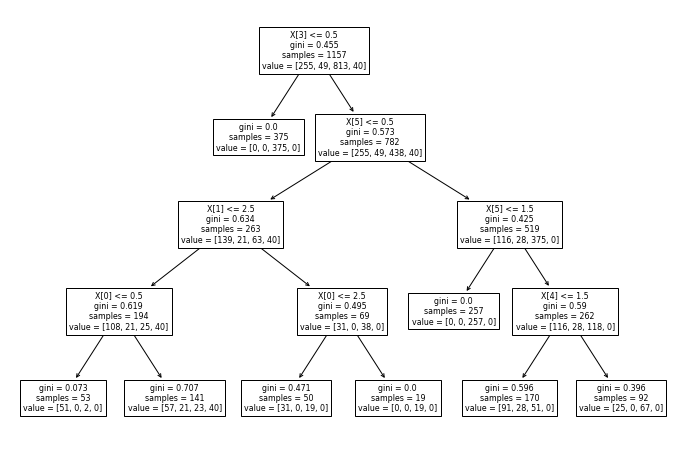

In [91]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

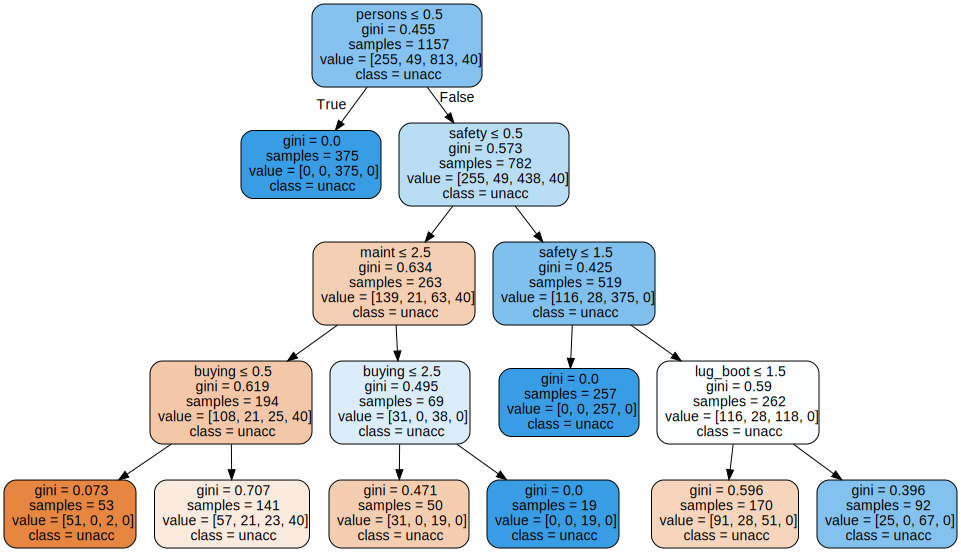

In [92]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

## Decision Tree with criterion ENTROPY 

In [93]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [94]:
y_pred_en = clf_en.predict(X_test)


In [95]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8371


In [96]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'acc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [97]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8194


### Check for overfitting and underfitting

In [98]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8194
Test set score: 0.8371


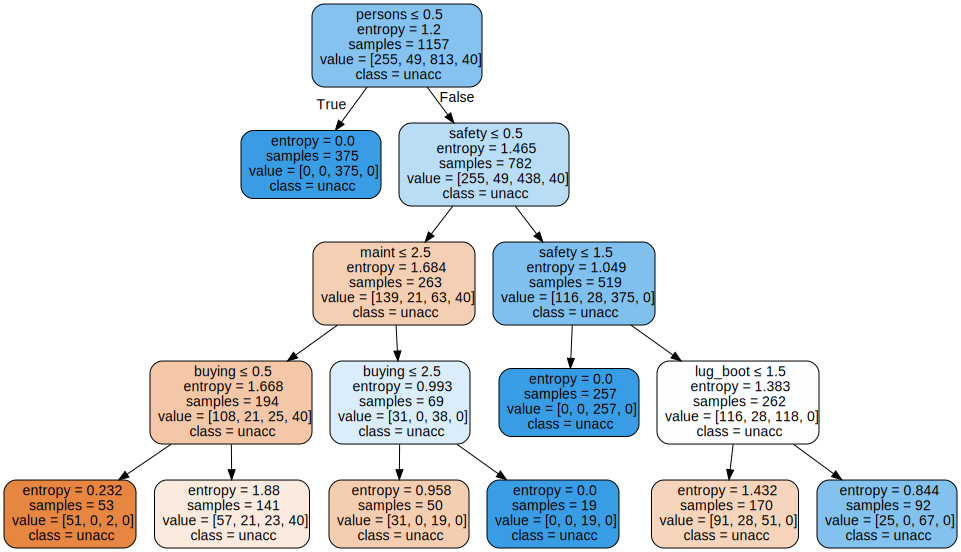

In [99]:
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 


### References:

#### Book: Python Data Science Handbook by Jake VanderPLas
#### Kaggle: https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial#Decision-Tree-Classifier-Tutorial-with-Python